# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [209]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [210]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [212]:
#Value_Numeric = (fifa_masculino.Value.replace(r'[KM]+€', '', regex=True).astype(float)*\fifa_masculino.Value.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [214]:
def convierte(colval):
    if "M" in colval:
        colval = colval.replace("M","")
        return float(colval)
    elif "K" in colval:
        colval = colval.replace("K","")
        return float(colval)/1000

In [215]:
def limpia_euros(colval):
    if "€" in colval:
        return convierte(colval.replace("€",""))

fifa["ValueNumeric"] = fifa["Value"].apply(limpia_euros)

In [218]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.00
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,...,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,93.00
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,...,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,67.00
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,...,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,80.00
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,...,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,51.00
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,...,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,68.00


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [230]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [231]:
# Your code here:
formula = 'ValueNumeric ~ C (fifa["Preferred Foot"]) + C(Position)'
model = ols(formula=formula, data=fifa).fit()

In [232]:
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",231.646105,1.0,7.510257,6.140953e-03
C(Position),16596.095506,26.0,20.694853,1.699733e-95
Residual,551459.281946,17879.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
#F nos da la estimación de la varianza dentro de un mismo grupo. 
#Vemos que existe mayor varianza en Position, lo que nos da a entender
#que existe mayor relación entre la posición y el sueldo del futbolista.

#En cuanto a PR(>F), observamos que tanto para Preferred Foot como para Position, los valores son inferiores a 0.05.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [250]:
# Your code here:
formula = 'ValueNumeric ~ C(Nationality)'
model = ols(formula=formula, data=fifa).fit()


In [251]:
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),32816.950752,162.0,6.713684,8.383689e-132
Residual,535394.461682,17744.0,NaN,NaN


What is your conclusion from this ANOVA?

In [249]:
#F nos da la estimación de la varianza dentro de un mismo grupo. 
#Observamos que en este caso, Nationality está al nivel de Preffered Foot, ambas estando muy por debajo de Position.

#En cuanto a PR(>F), observamos que tanto para Preferred Foot como para Position, nationality tambien 
#tiene un valor inferior a 0.05.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [240]:
fifa.shape

(18207, 21)

In [246]:
#fifa.isnull().sum()

In [247]:
# Your code here:
fifa = fifa.dropna(axis=0)
fifa.shape

(17907, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [261]:
X = sm.add_constant(fifa[[
    'Stamina', 
    'SprintSpeed', 
                  ]].apply(lambda x: x.fillna(x.mean())))
Y = fifa['ValueNumeric']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)


In [263]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     452.2
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          2.64e-192
Time:                        21:32:03   Log-Likelihood:                -55923.
No. Observations:               17907   AIC:                         1.119e+05
Df Residuals:                   17904   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0722      0.197    -15.576      0.000      -3.459      -2.686
Stamina         0.0604      0.003     18.346      0.000       0.054       0.067
SprintSpeed     0.0263      0.004      7.376      0.000       0.019       0.033
==============================================================================
Omnibus:                    22822.402   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4639541.011
Skew:                           7.039   Prob(JB):                         0.00
Kurtosis:                      80.588   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [264]:
# Your conclusions here:
#Vemos que R2 está cerca de 0. Por lo tanto el modelo es muy malo.
#A través de Prob (F-statistic), podemos decir que las variables son independientes, por lo que rechazamos la H0.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [266]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Preferred Foot', 'Position', 'Weak Foot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric'],
      dtype='object')

In [274]:
# Your code here:
y = fifa['ValueNumeric']
x = sm.add_constant(fifa['Potential'])

model = sm.OLS(y, x).fit()
predictions = model.predict(X)


In [275]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9073.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:50:52   Log-Likelihood:                -52693.
No. Observations:               17907   AIC:                         1.054e+05
Df Residuals:                   17905   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.5212      0.400    -88.778      0.000     -36.305     -34.737
Potential      0.5323      0.006     95.252      0.000       0.521       0.543
==============================================================================
Omnibus:                    23011.631   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6334620.314
Skew:                           7.010   Prob(JB):                         0.00
Kurtosis:                      94.068   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [276]:
# Your conclusions here:
#El modelo es malo, aunque mejor que el anterior, ya que el valor se acerca más a 1.
#A través de Prob (F-statistic) (que es PValue), podemos decir que las variables son totalmente independientes, 
#por lo que rechazamos la H0.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [280]:
from scipy.stats import linregress

In [281]:
reg_result = linregress(fifa['Potential'], fifa['ValueNumeric'])

In [282]:
x = np.linspace(fifa['Potential'].min(), fifa['Potential'].max(), 50)
y = reg_result[1] + reg_result[0] * x

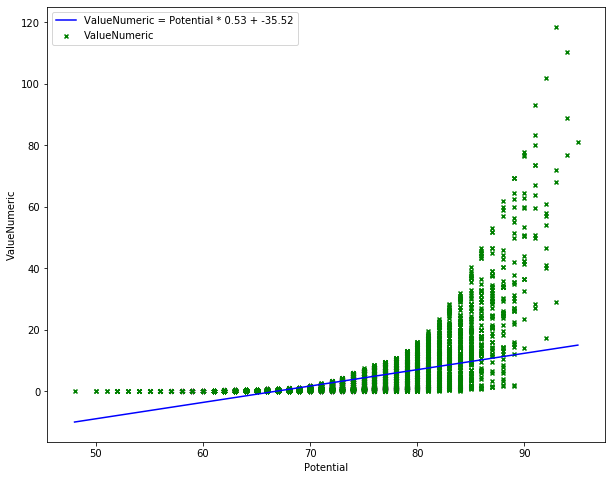

In [284]:
# Your code here:
plt.figure(figsize=(10, 8))
plt.plot(x, y, c='b', 
         label=f'ValueNumeric = Potential * {reg_result[0]:.2f} + {reg_result[1]:.2f}')
plt.scatter(fifa['Potential'], 
            fifa['ValueNumeric'], 
            marker='x', 
            c='g', 
            s=16,
            label='ValueNumeric')
plt.xlabel('Potential')
plt.ylabel('ValueNumeric')
plt.legend()
plt.show()